In [1]:
# Data used: Bitcoin OTC web of trust network
# (trust weighted signed network)
# Group 2
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/My Drive/IR3data/soc-sign-bitcoinotc.csv')
data = data[['Source','Target','Rating']]


Mounted at /content/drive


Question 1

In [2]:
nodes = set()

#to find number of distinct nodes
for i in range(len(data)):
  nodes.add(data['Source'][i])
  nodes.add(data['Target'][i])


In [3]:
num_nodes = max(nodes)
adj_matrix = list()
edge_list = list()

for i in range(num_nodes):
  row = [0 for j in range(num_nodes)] 
  adj_matrix.append(row)
# print(len(adj_matrix), len(adj_matrix[0]))
k=0
for i in range(len(data)):
  src = data['Source'][i]
  tgt = data['Target'][i]  
  adj_matrix[src-1][tgt-1] = 1
  edge_list.append([src, tgt])

print("Number of nodes: ", len(nodes))
print("Number of edges: ", len(edge_list))

Number of nodes:  5881
Number of edges:  35592


In [4]:
# in_out_degrees[node] = [in, out]
in_out_degrees = dict()
for idx in range(1, len(adj_matrix)+1):
  if idx not in in_out_degrees:
    in_out_degrees[idx] = [0, 0]
  in_out_degrees[idx][1] = sum(adj_matrix[idx-1])

  for i in range(len(adj_matrix)):
      in_out_degrees[idx][0] += adj_matrix[i][idx-1]

print(in_out_degrees)


{1: [226, 215], 2: [41, 45], 3: [21, 0], 4: [54, 63], 5: [3, 3], 6: [44, 40], 7: [216, 232], 8: [3, 1], 9: [1, 1], 10: [5, 8], 11: [0, 0], 12: [0, 0], 13: [191, 210], 14: [0, 0], 15: [13, 15], 16: [1, 0], 17: [19, 26], 18: [0, 0], 19: [10, 12], 20: [10, 0], 21: [26, 22], 22: [0, 0], 23: [26, 18], 24: [0, 0], 25: [113, 0], 26: [11, 12], 27: [0, 0], 28: [11, 7], 29: [35, 33], 30: [0, 0], 31: [2, 2], 32: [6, 6], 33: [32, 32], 34: [3, 3], 35: [535, 763], 36: [33, 35], 37: [12, 13], 38: [0, 0], 39: [25, 25], 40: [0, 0], 41: [95, 100], 42: [0, 0], 43: [0, 0], 44: [3, 2], 45: [11, 11], 46: [1, 1], 47: [2, 2], 48: [0, 0], 49: [0, 0], 50: [0, 0], 51: [29, 30], 52: [1, 1], 53: [2, 2], 54: [7, 7], 55: [1, 1], 56: [6, 7], 57: [80, 59], 58: [0, 0], 59: [0, 0], 60: [66, 63], 61: [9, 5], 62: [52, 14], 63: [0, 0], 64: [69, 78], 65: [1, 1], 66: [1, 1], 67: [0, 0], 68: [5, 5], 69: [9, 7], 70: [6, 6], 71: [1, 1], 72: [11, 11], 73: [0, 0], 74: [1, 1], 75: [10, 7], 76: [3, 3], 77: [14, 21], 78: [10, 8], 79

In [5]:
for i in range(1, len(in_out_degrees)):
  if in_out_degrees[i] == [0, 0]:
    del(in_out_degrees[i])

print(in_out_degrees)
print(len(in_out_degrees))

avg_in_degree = 0
avg_out_degree = 0
for i in in_out_degrees.keys():
  avg_in_degree += in_out_degrees[i][0] / len(in_out_degrees)
  avg_out_degree += in_out_degrees[i][1] / len(in_out_degrees)

print("Average In-Degree: ", avg_in_degree)
print("Average Out-Degree: ", avg_out_degree)

{1: [226, 215], 2: [41, 45], 3: [21, 0], 4: [54, 63], 5: [3, 3], 6: [44, 40], 7: [216, 232], 8: [3, 1], 9: [1, 1], 10: [5, 8], 13: [191, 210], 15: [13, 15], 16: [1, 0], 17: [19, 26], 19: [10, 12], 20: [10, 0], 21: [26, 22], 23: [26, 18], 25: [113, 0], 26: [11, 12], 28: [11, 7], 29: [35, 33], 31: [2, 2], 32: [6, 6], 33: [32, 32], 34: [3, 3], 35: [535, 763], 36: [33, 35], 37: [12, 13], 39: [25, 25], 41: [95, 100], 44: [3, 2], 45: [11, 11], 46: [1, 1], 47: [2, 2], 51: [29, 30], 52: [1, 1], 53: [2, 2], 54: [7, 7], 55: [1, 1], 56: [6, 7], 57: [80, 59], 60: [66, 63], 61: [9, 5], 62: [52, 14], 64: [69, 78], 65: [1, 1], 66: [1, 1], 68: [5, 5], 69: [9, 7], 70: [6, 6], 71: [1, 1], 72: [11, 11], 74: [1, 1], 75: [10, 7], 76: [3, 3], 77: [14, 21], 78: [10, 8], 79: [1, 1], 80: [17, 17], 81: [9, 6], 83: [1, 1], 86: [1, 1], 87: [2, 2], 88: [6, 7], 89: [2, 2], 93: [13, 12], 94: [1, 1], 95: [6, 6], 96: [37, 42], 97: [4, 4], 99: [1, 1], 100: [8, 12], 101: [7, 5], 103: [1, 0], 104: [54, 56], 105: [2, 1], 

In [6]:
# [node, in/out degree]
max_in_node = [0, 0]
max_out_node = [0, 0]

for i in in_out_degrees.keys():
  if in_out_degrees[i][0] > max_in_node[1]:
    max_in_node[0] = i
    max_in_node[1] = in_out_degrees[i][0]
  if in_out_degrees[i][1] > max_out_node[1]:
    max_out_node[0] = i
    max_out_node[1] = in_out_degrees[i][1]

print(f"Node {max_in_node[0]} has max In-Degree value of: {max_in_node[1]}")
print(f"Node {max_out_node[0]} has max Out-Degree value of: {max_out_node[1]}")

Node 35 has max In-Degree value of: 535
Node 35 has max Out-Degree value of: 763


In [7]:
#for density of graph
num_nodes = len(in_out_degrees)
max_edges = num_nodes * (num_nodes - 1)

# print(len(edge_list),num_nodes, max_edges )
network_density = 0

for edge in edge_list:
  network_density += 1/(max_edges)

print(f"The density of network is (between 0 and 1) {network_density} or {network_density*100} %")

The density of network is (between 0 and 1) 0.0010292571373043777 or 0.10292571373043777 %


In [8]:
# for degree distribution of the network
in_degree_nodes = dict()
out_degree_nodes = dict()

max_in_degree = max_in_node[1]
max_out_degree = max_out_node[1]

for in_deg in range(0, max_in_degree + 1):
  in_degree_nodes[in_deg] = []

for out_deg in range(0, max_out_degree + 1):
  out_degree_nodes[out_deg] = []

for node in in_out_degrees.keys():
  in_v = in_out_degrees[node][0]
  out_v = in_out_degrees[node][1]
  
  in_degree_nodes[in_v].append(node)
  out_degree_nodes[out_v].append(node)

in_degree_values = [i for i in range(max_in_degree+1)]
out_degree_values = [i for i in range(max_out_degree+1)]
indegree_node_count = [len(in_degree_nodes[i]) for i in range(max_in_degree+1)]
outdegree_node_count = [len(out_degree_nodes[i]) for i in range(max_out_degree+1)]

print(indegree_node_count) 
print(outdegree_node_count)

[23, 2427, 1042, 565, 335, 235, 189, 142, 95, 87, 75, 68, 46, 39, 38, 27, 40, 21, 30, 24, 22, 21, 6, 13, 11, 12, 13, 11, 7, 15, 5, 9, 7, 7, 6, 4, 7, 10, 7, 2, 1, 4, 2, 2, 4, 3, 3, 5, 4, 1, 3, 3, 3, 6, 8, 4, 1, 2, 2, 1, 1, 1, 1, 3, 3, 1, 1, 0, 2, 3, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

[]

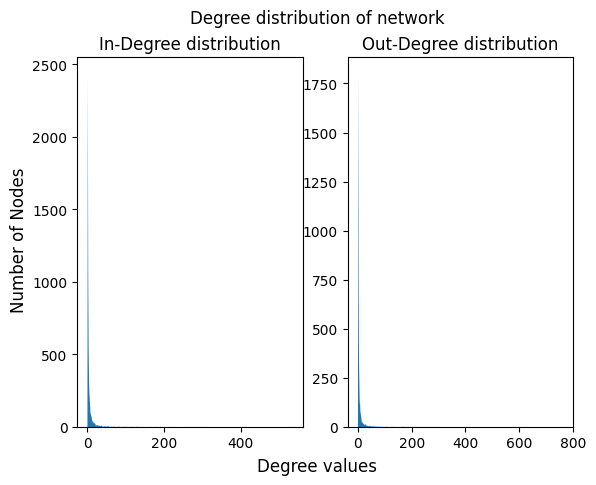

In [9]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2)
plt.suptitle("Degree distribution of network")
ax1.stackplot(in_degree_values, indegree_node_count)
ax2.stackplot(out_degree_values, outdegree_node_count)
ax1.set_title("In-Degree distribution")
ax2.set_title("Out-Degree distribution")
fig.supxlabel("Degree values")
fig.supylabel("Number of Nodes")
plt.plot()

In [10]:
node_lcc = dict()
for node in range(len(adj_matrix)):
  node_lcc[node+1] = 0
  local_neighbors = []
  local_tr_edges = 0
  for j in range(len(adj_matrix)):
    if adj_matrix[node][j] != 0:
      local_neighbors.append(j)
  # implementation 1
  for neigh1 in local_neighbors:
    for neigh2 in local_neighbors:
      if(neigh1 != neigh2 and neigh2 > neigh1 and adj_matrix[neigh1][neigh2] == 1):
        local_tr_edges +=1
  #if there are any out-going edges at all
  if(node+1 in in_out_degrees and in_out_degrees[node+1][1] > 1):
    node_lcc[node+1] = 2*local_tr_edges / (in_out_degrees[node+1][1]*(in_out_degrees[node+1][1]-1))

  ## implementation 2
  # for neigh1 in local_neighbors:
  #   for neigh2 in local_neighbors:
  #     if(neigh1 != neigh2 and adj_matrix[neigh1][neigh2] == 1):
  #       local_tr_edges +=1
  ## if there are any out-going edges at all
  # if(node+1 in in_out_degrees and in_out_degrees[node+1][1] > 1):
  #   node_lcc[node+1] = local_tr_edges / (in_out_degrees[node+1][1]*(in_out_degrees[node+1][1]-1))  

In [11]:
#Local clustering coefficient for each node
print(node_lcc)

{1: 0.04525103238426429, 2: 0.11313131313131314, 3: 0, 4: 0.0855094726062468, 5: 1.0, 6: 0.11282051282051282, 7: 0.023175100761307656, 8: 0, 9: 0, 10: 0.35714285714285715, 11: 0, 12: 0, 13: 0.03814080656185919, 14: 0, 15: 0.047619047619047616, 16: 0, 17: 0.10461538461538461, 18: 0, 19: 0.12121212121212122, 20: 0, 21: 0.11255411255411256, 22: 0, 23: 0.0915032679738562, 24: 0, 25: 0, 26: 0.045454545454545456, 27: 0, 28: 0.19047619047619047, 29: 0.08143939393939394, 30: 0, 31: 1.0, 32: 0.26666666666666666, 33: 0.2217741935483871, 34: 1.0, 35: 0.002672831033735462, 36: 0.05042016806722689, 37: 0.038461538461538464, 38: 0, 39: 0.12333333333333334, 40: 0, 41: 0.057373737373737375, 42: 0, 43: 0, 44: 0.0, 45: 0.05454545454545454, 46: 0, 47: 1.0, 48: 0, 49: 0, 50: 0, 51: 0.10344827586206896, 52: 0, 53: 0.0, 54: 0.5238095238095238, 55: 0, 56: 0.5714285714285714, 57: 0.15604909409701928, 58: 0, 59: 0, 60: 0.03840245775729647, 61: 0.3, 62: 0.02197802197802198, 63: 0, 64: 0.04195804195804196, 65: 0

[]

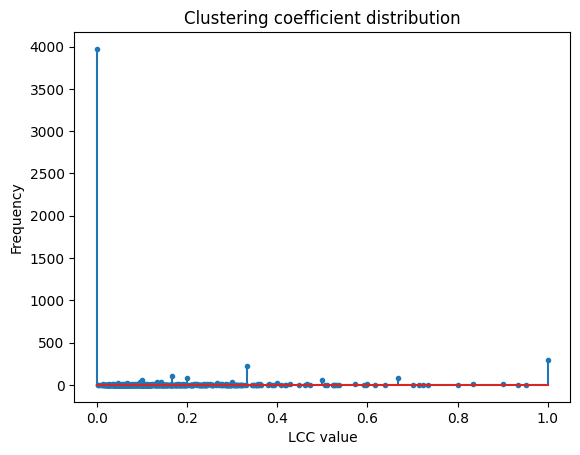

In [12]:
lcc_freq = dict()

for node in node_lcc.keys():
  if node_lcc[node] not in lcc_freq:
    lcc_freq[node_lcc[node]] = 0  
  lcc_freq[node_lcc[node]] += 1

lcc = [key for key in lcc_freq.keys()]
vals = [lcc_freq[key] for key in lcc]

plt.stem(lcc, vals, markerfmt=".")
plt.title("Clustering coefficient distribution")
plt.xlabel("LCC value")
plt.ylabel("Frequency")
plt.plot()

Quesion 2

In [13]:
import numpy as np
import networkx as nx

#for adjacency matrix to be usable by networkx
nx_adj = np.array(adj_matrix)
nxgraph = nx.from_numpy_array(nx_adj)

pagerank = nx.pagerank(nxgraph)
# for node in pagerank.keys():
#   print(f"Pagerank for node {node} is {pagerank[node]}")
print("Pageranks for all the nodes in the network: ")
print(pagerank)


Pageranks for all the nodes in the network: 
{0: 0.005024805088082691, 1: 0.0009668627006184982, 2: 0.0004025235217013952, 3: 0.0013693827741115651, 4: 7.473169259470904e-05, 5: 0.0009754434724193734, 6: 0.005074084331829717, 7: 7.530656591482909e-05, 8: 4.159776620347804e-05, 9: 0.00017581346067277223, 10: 2.5425452573055805e-05, 11: 2.5425452573055805e-05, 12: 0.004193646717869466, 13: 2.5425452573055805e-05, 14: 0.00034123703675749325, 15: 4.198457230233017e-05, 16: 0.0005117068474406833, 17: 2.5425452573055805e-05, 18: 0.00023162283353828786, 19: 0.00019499493493989887, 20: 0.0005627730489727674, 21: 2.5425452573055805e-05, 22: 0.0005971787362074166, 23: 2.5425452573055805e-05, 24: 0.001988711319042047, 25: 0.00033317471602075445, 26: 2.5425452573055805e-05, 27: 0.00023883991359845396, 28: 0.0008781991045267751, 29: 2.5425452573055805e-05, 30: 5.872312532536184e-05, 31: 0.00012179671135079013, 32: 0.0006067142806145686, 33: 7.61809770079429e-05, 34: 0.024870450656052912, 35: 0.0009

In [14]:
auth_hub_scores = nx.hits(nxgraph)
# print(len(auth_hub_scores))
auth_scores = auth_hub_scores[0]
hub_scores = auth_hub_scores[1]

print("Authority scores for each node in network: ")
print(auth_scores)

print("Hub scores for each node in network: ")
print(hub_scores)


Authority scores for each node in network: 
{0: 0.004579464470305618, 1: 0.0006876352603521222, 2: 0.000488642705002598, 3: 0.0012674078986368597, 4: 0.00016243205851754086, 5: 0.001603081499140313, 6: 0.0025545993421224795, 7: 9.704185949674784e-05, 8: 8.513671391441614e-05, 9: 0.0002942490417440388, 10: -0.0, 11: -0.0, 12: 0.0036248563170330596, 13: -0.0, 14: 0.00031526275784493515, 15: 6.738961667793265e-05, 16: 0.0006103231915916029, 17: -0.0, 18: 0.00030010458309318516, 19: 0.00021891902172456644, 20: 0.0003461232336401093, 21: -0.0, 22: 0.0004479825936331318, 23: -0.0, 24: 0.002391268339288233, 25: 0.0001813456191120672, 26: -0.0, 27: 0.00017506679784609806, 28: 0.0006544058274965472, 29: -0.0, 30: 0.00010869906369980851, 31: 0.0002703834732871003, 32: 0.001271256490580891, 33: 0.00020001882556998146, 34: 0.004748933722441035, 35: 0.0003992935478464183, 36: 0.00016819169300708633, 37: -0.0, 38: 0.00033804942883334475, 39: -0.0, 40: 0.0020094061967984066, 41: -0.0, 42: -0.0, 43: 5

In [15]:
node = [i for i in pagerank.keys()]
nodes = len(node)
pr = [pagerank[i] for i in range(nodes)]
aut = [auth_scores[i] for i in range(nodes)]
hub = [hub_scores[i] for i in range(nodes)]

#Average difference between Pagerank and Authority scores
avg_pr_aut_diff = 0

#Average difference between Pagerank and Hub scores
avg_pr_hub_diff = 0

for i in range(len(pr)):
  avg_pr_aut_diff += abs(pr[i] - aut[i]) / nodes 
  avg_pr_hub_diff += abs(pr[i] - hub[i]) / nodes 

print(f"Mean absolute difference between Pagerank and Authority scores is : {avg_pr_aut_diff}")
print(f"Mean absolute difference between Pagerank and Hub scores is : {avg_pr_hub_diff}")


Mean absolute difference between Pagerank and Authority scores is : 9.112600341445536e-05
Mean absolute difference between Pagerank and Hub scores is : 9.112600341445534e-05
